# librosa 모듈로 mp3 파일 mfcc로 변환 후 시각화
*****

### mfcc란?
인간이 소리를 인식하는 방식을 모방하여 오디오 데이터를 변환 및 압축한 것.   
Audio 디렉터리에 About_MFCC.ipynb 파일에 간단한 과정 요약해 놓았음.

오디오 데이터와 mfcc에 대한 더 자세한 정보는 다음 링크 참조.   
https://hyunlee103.tistory.com/54
*****
* **mp3 파일을 librosa로 읽어 들이기 위해 ffmpeg가 백엔드로 있어야함.**   
터미널에 다음 명령어 입력해서 설치 필요   
conda install -c conda-forge ffmpeg
* librosa.load()에 뜨는 에러는 mp3 파일을 가져오기 때문. wav파일을 가져오면 뜨지 않음. 프로그램상 오류는 아니며 메세지일 뿐이다.

In [23]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa

In [24]:
### mp3 파일을 librosa로 읽어와서 오디오 신호의 정보와 그림, 플레이어를 그리는 함수

def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player

    Notebook: C1/B_PythonAudio.ipynb

    Args:
        x: Input signal
        Fs: Sampling rate of x
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

In [25]:
### mp3 파일이 저장되어 있는 경로 가져와서 librosa.load() 함수로 읽어옴
path_mp3 = 'dataset_mp3_3sec/Unavailable_3sec.mp3'
x, Fs = librosa.load(path_mp3)

C:\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [26]:
# librosa.load()가 반환하는 값은 넘파이 배열로 이루어진 mp3 파일의 신호 정보와 초당 샘플링 횟수
print(type(x))
print(Fs)

<class 'numpy.ndarray'>
22050


MP3 file:  Fs = 22050, x.shape = (66552,), x.dtype = float32


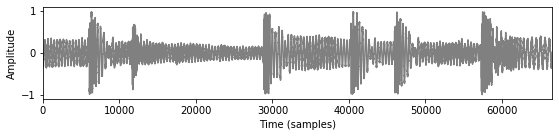

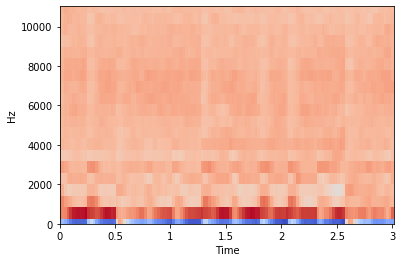

In [27]:
### 오디오 정보 출력 함수와 mfcc 시각화 함수 사용.
### x축은 시간, y축은 진동수
import librosa.display

print_plot_play(x=x, Fs=Fs, text='MP3 file: ')
mfcc = librosa.feature.mfcc(y=x)
librosa.display.specshow(mfcc, x_axis='time', y_axis='linear')

C:\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


MP3 file:  Fs = 44100, x.shape = (133103,), x.dtype = float32


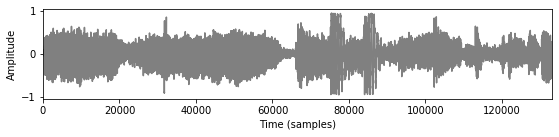

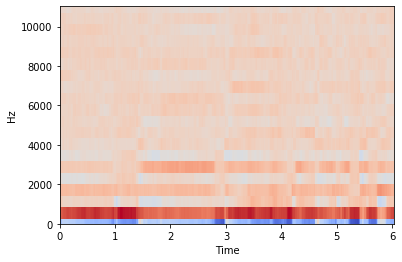

In [28]:
path_mp3 = 'dataset_mp3_3sec/DKMV_3sec.mp3'
x, Fs = librosa.load(path_mp3, sr=None)
print_plot_play(x=x, Fs=Fs, text='MP3 file: ')
mfcc = librosa.feature.mfcc(y=x)
librosa.display.specshow(mfcc, x_axis='time', y_axis='linear')

In [12]:
### mfcc로 변환한 데이터의 형상
mfcc.shape

(20, 260)

### 배운 것?
1. mp3 파일 경로로 가져와서, librosa.feature.mfcc()로 변환 -> 이때 sr(샘플링 레이트) 모두 맞춰야함. 기본 값(22050)으로 하면 될듯 함
2. 3초짜리 음성데이터 mfcc로 변환했더니 (20, 260) 형상의 넘파이배열 생성   -> common voice dataset 데이터들 길이 다 똑같이 맞춰야겠지??